In [105]:
def generateAverageTime(workerDataPath):
    with open('generatedData/' + workerDataPath) as f:
        lines = f.readlines()

        split = [time.split('\n', 1)[0] for time in lines]
        removeSpace = [time.split(' ', 1)[0] for time in split]
        getMin = [time[2:7] for time in removeSpace]
        replaceColon = [time.replace(':', '.') for time in getMin]
        allTimes = [float(time) for time in replaceColon]
        
        average = sum(allTimes) / len(allTimes)
        rounded = round(average, 5)
        return rounded

        

avg = generateAverageTime("duration_1_worker.txt")
print(avg)

17.6875


In [106]:
def generateY():
    oneAvg = generateAverageTime("duration_1_worker.txt")
    twoAvg = generateAverageTime("duration_2_workers.txt")
    threeAvg = generateAverageTime("duration_3_worker.txt")
    y = [oneAvg, twoAvg, threeAvg]
    
    return y

In [107]:
x = [1, 2, 3]
y = generateY()

#xIdeal = [*range(1, 4)]
#yIdeal = [17.6875]*3

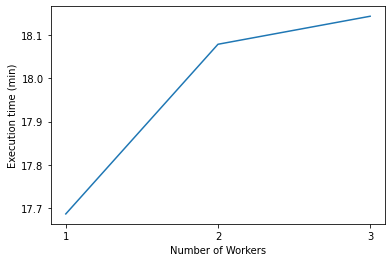

In [109]:
import matplotlib.pyplot as plt
import math

plt.plot(x, y)
#plt.plot(xIdeal, yIdeal)

new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)


plt.xlabel("Number of Workers")
plt.ylabel("Execution time (min)")


plt.show()